In [4]:
import pandas as pd
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os
import math
import sys

In [5]:
sys.path.append(os.path.dirname(os.getcwd()))
from EDP_Model_Testing.test_lstm import WindTurbineDataset, get_data_loaders, get_aggregate_data

# Check Distributions of Missing Data/Faults

In [6]:
def visualize_missing_data(df, df_name): 
    missing_data_check_df = df.copy()
    missing_data_check_df['Timestamp'] = pd.to_datetime(missing_data_check_df['Timestamp'])
    missing_data_check_df.set_index('Timestamp', inplace=True)
    complete_range = pd.date_range(start=missing_data_check_df.index.min(), end=missing_data_check_df.index.max(), freq='10min')
    missing_timestamps = complete_range.difference(missing_data_check_df.index)
    
    if df_name == "raw_df": 
        power = 'Prod_LatestAvg_TotActPwr'
    else: 
        power = 'Power'
    
    nan_powers = missing_data_check_df[missing_data_check_df[power].isna()].index

    print("Total expected timestamps: ", len(complete_range))
    print("Total missing timestamps: ", len(missing_timestamps))
    print("Total nan data entries: ", len(nan_powers))

    plt.figure(figsize=(15, 6))
    plt.plot(complete_range, [1] * len(complete_range), '|', color='blue', markersize=10, label='Expected Timestamps')

    if len(missing_timestamps) > 0:
        plt.plot(missing_timestamps, [1] * len(missing_timestamps), '|', color='red', markersize=10, label='Missing Timestamps')

    if len(nan_powers) > 0:
        plt.plot(nan_powers, [1] * len(nan_powers), '|', color='yellow', markersize=10, label='Missing Power Values')

    plt.xlabel('Timestamp')
    plt.ylabel('Presence Indicator')
    plt.title(f'{df_name} Missing Timestamps (10-Minute Intervals)')
    plt.legend()
    plt.show()

In [7]:
def check_zero_features_zero_wind(df, df_name, cols_of_interest): 
    print(f"checking for {df_name} missing data ...")
    for col in cols_of_interest:
        zero_col_with_wind = (filtered_df[col] == 0) & (filtered_df["Wind_speed"] > 4.5)

In [15]:
def get_aggregate_data(data_folder_path):
    all_data = []
    
    for filename in sorted(os.listdir(data_folder_path)):
        if filename.endswith(".csv"):
            file_path = os.path.join(data_folder_path, filename)
            df = pd.read_csv(file_path, parse_dates=['Timestamp'])  # Ensure timestamp is parsed
            all_data.append(df)
    
    if all_data:
        aggregated_df = pd.concat(all_data, ignore_index=True)
        aggregated_df.sort_values(by="Timestamp", inplace=True)  # Sort by timestamp
        return aggregated_df
    
    return pd.DataFrame()

Wind Turbine 01


checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  593
Total nan data entries:  0


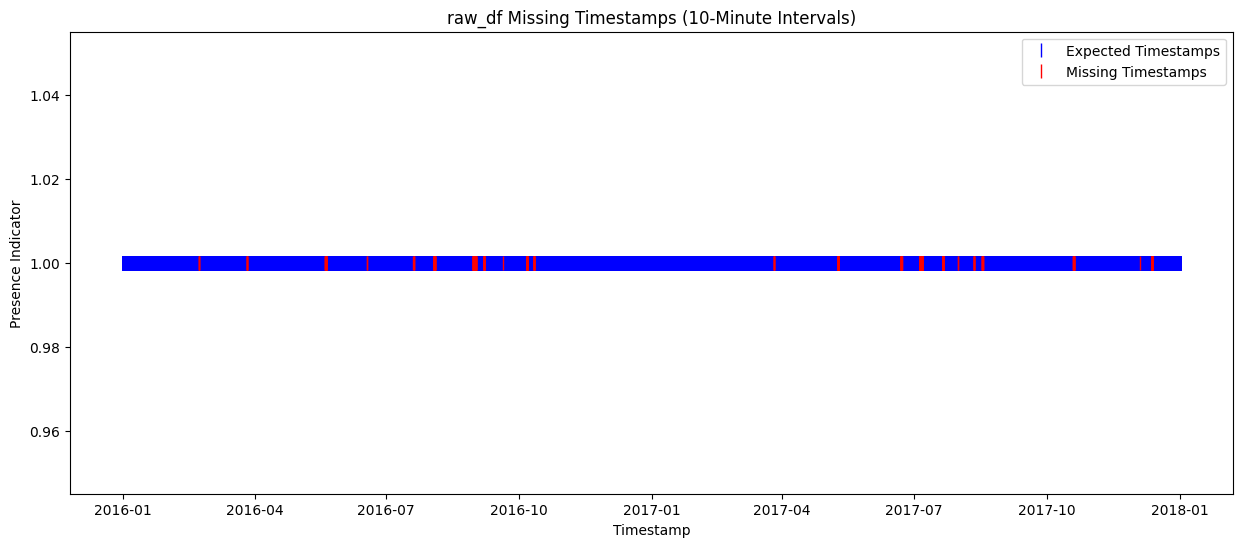

checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  7122


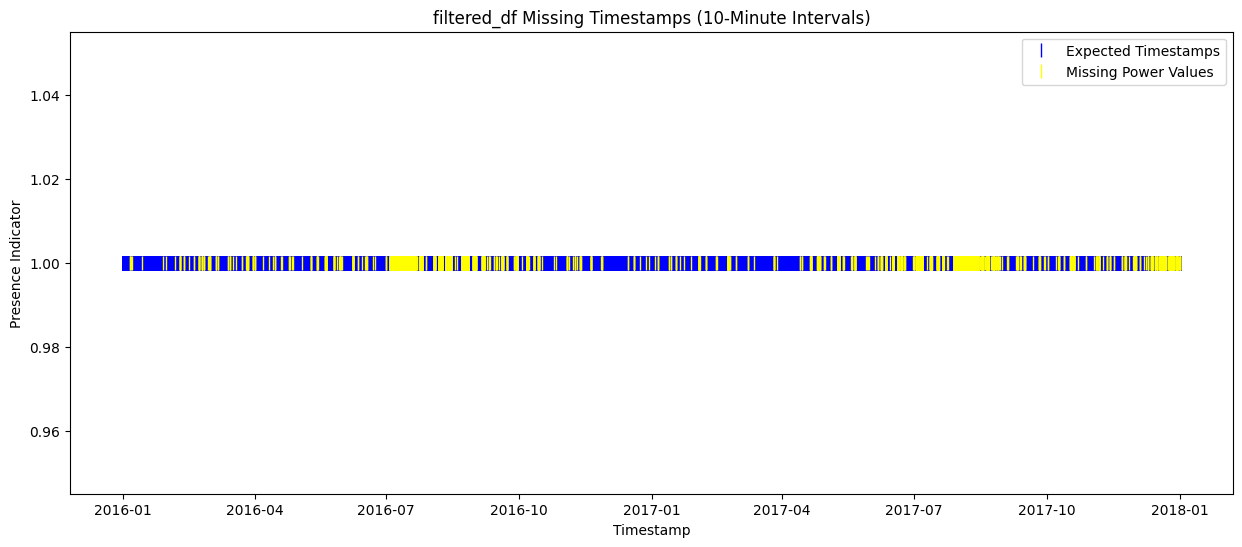

checking for prepared_df missing data ...
Total expected timestamps:  105261
Total missing timestamps:  0
Total nan data entries:  5333


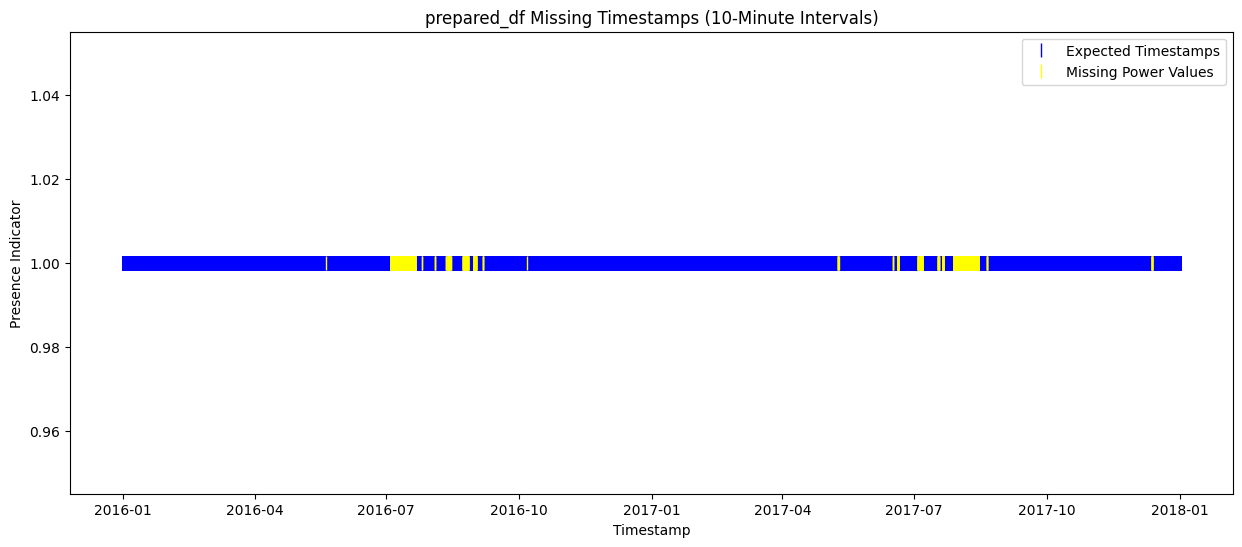

------------------------------------------------------------------------------------------------------------------------------------------------------
Wind Turbine 06
checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  2355
Total nan data entries:  0


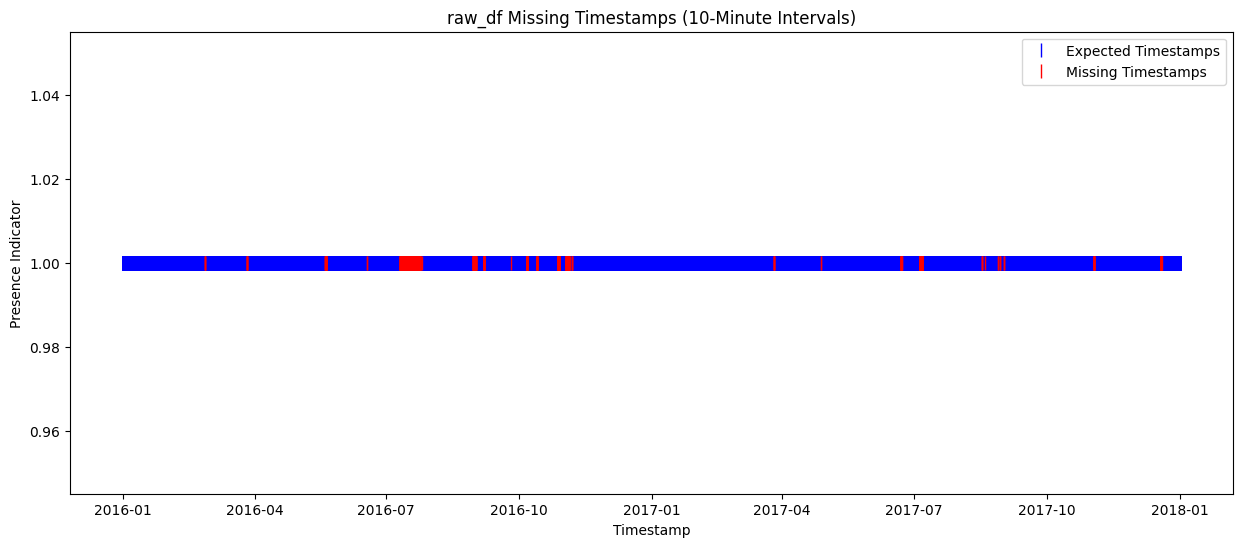

checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  21166


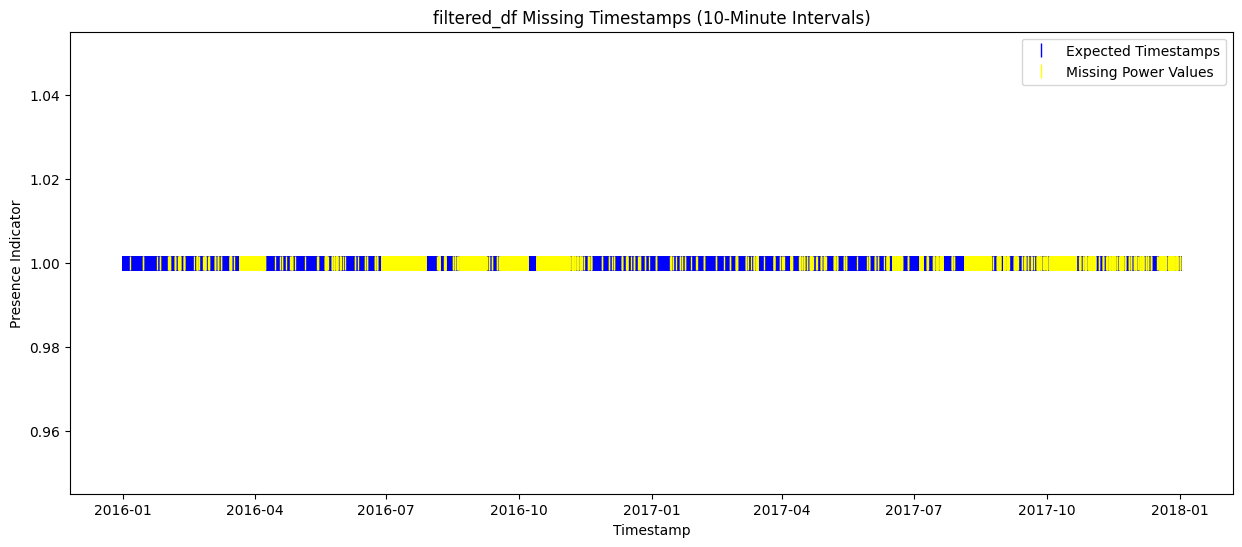

checking for prepared_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  19528


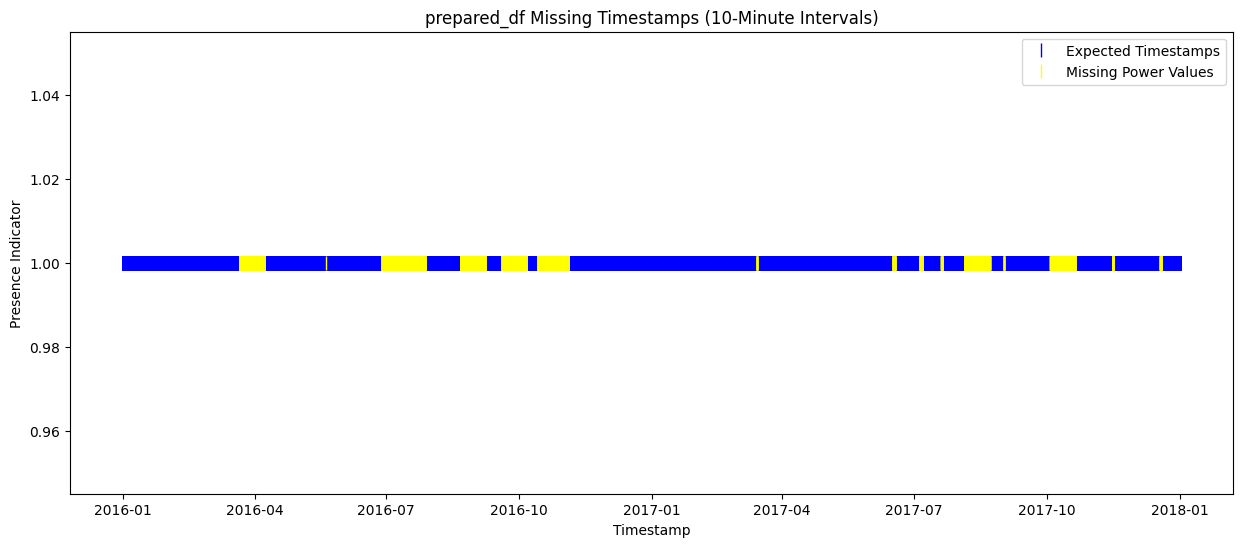

------------------------------------------------------------------------------------------------------------------------------------------------------
Wind Turbine 07
checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  537
Total nan data entries:  0


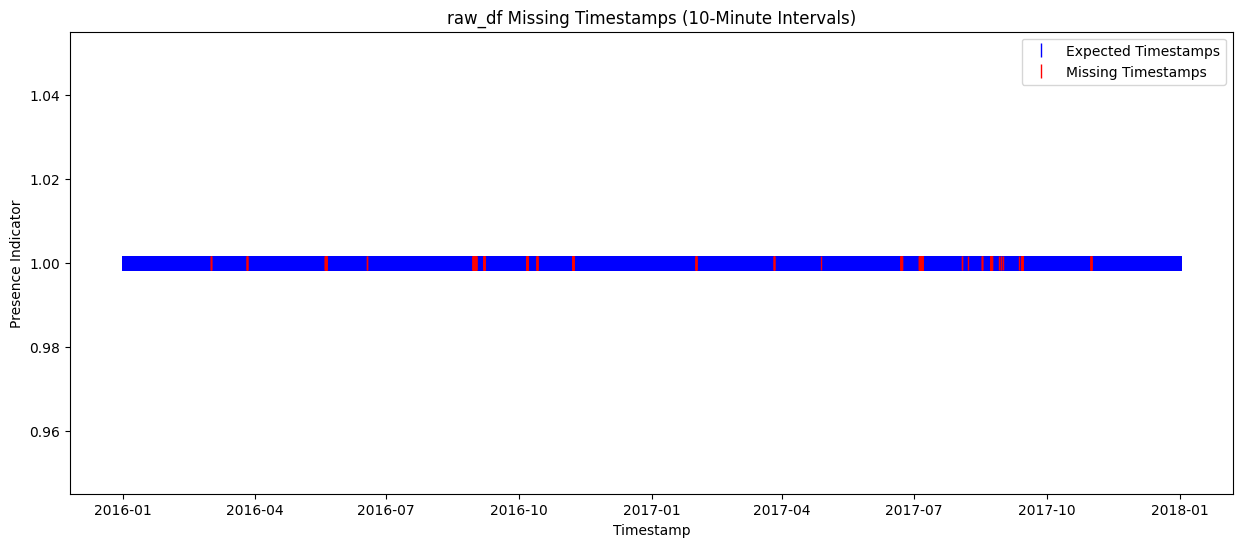

checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  17463


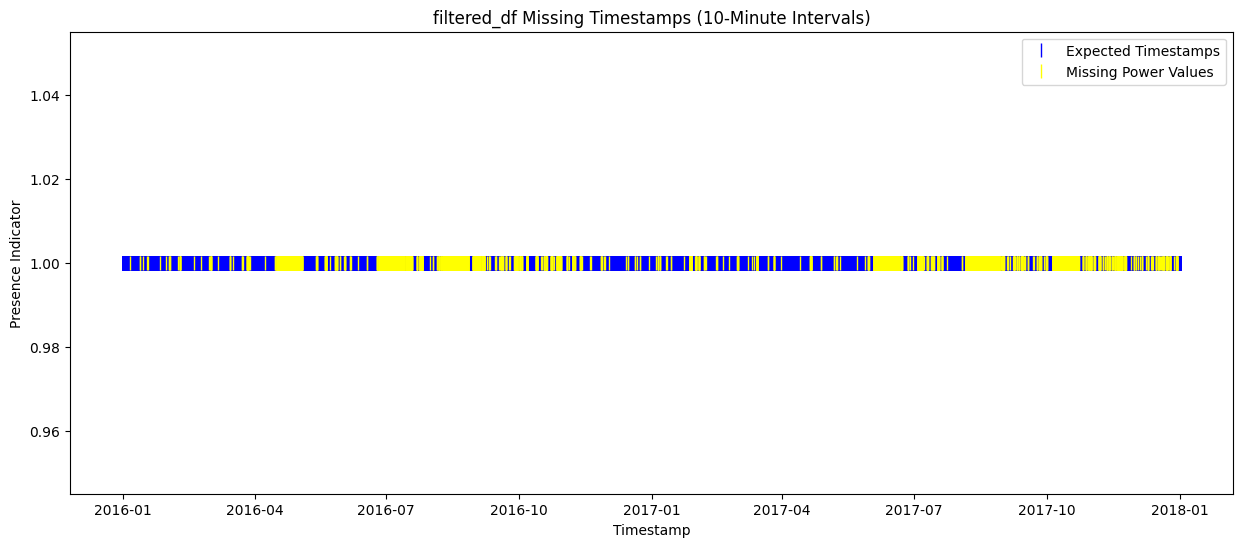

checking for prepared_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  15512


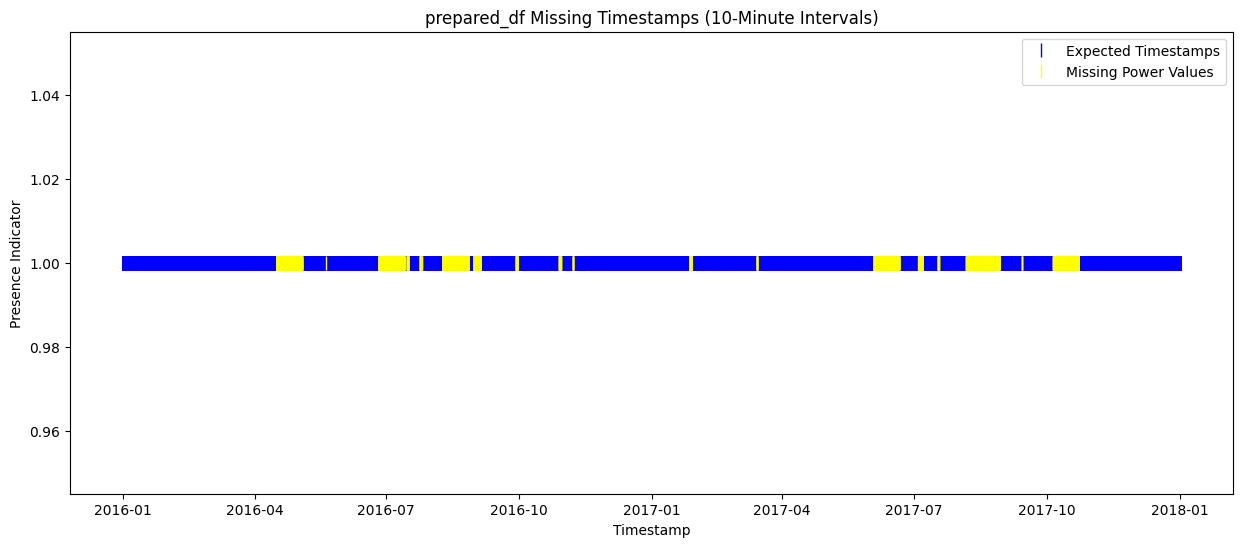

------------------------------------------------------------------------------------------------------------------------------------------------------
Wind Turbine 11
checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  478
Total nan data entries:  0


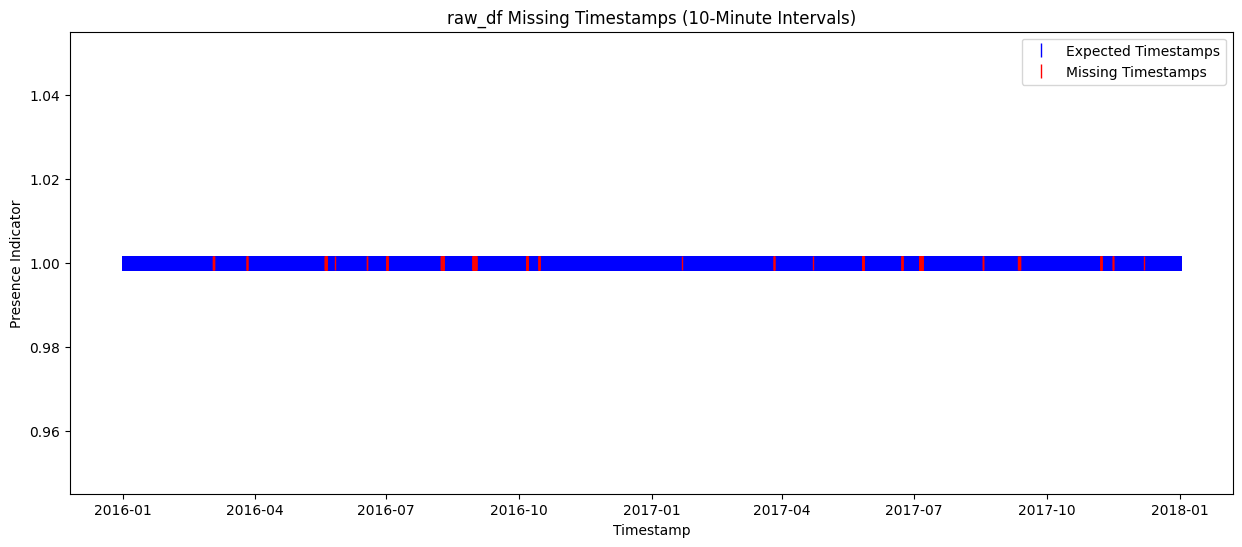

checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  11413


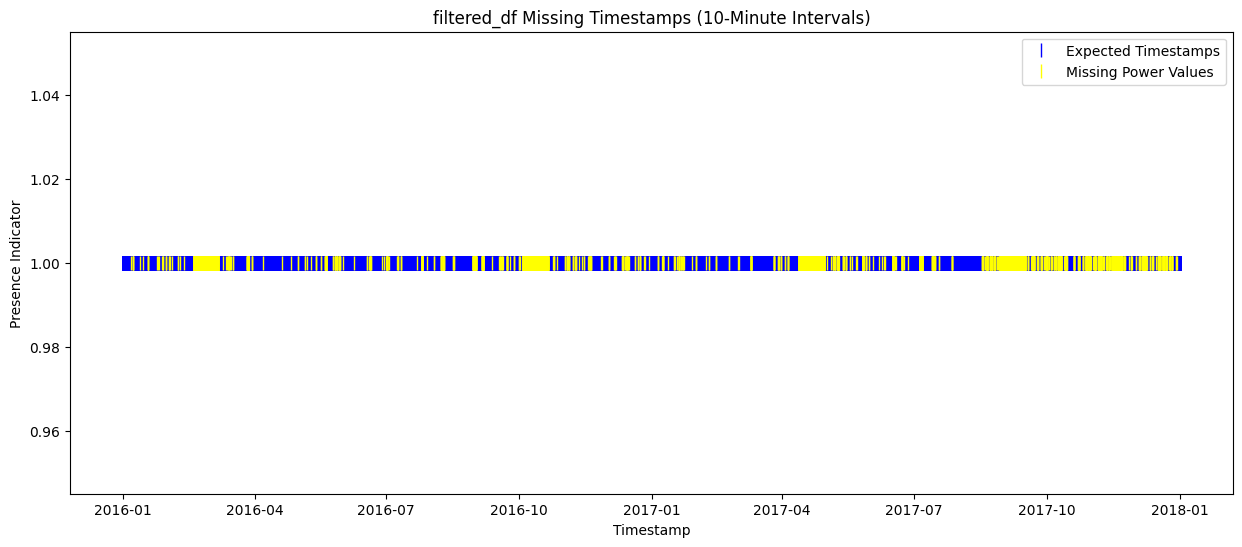

checking for prepared_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  9994


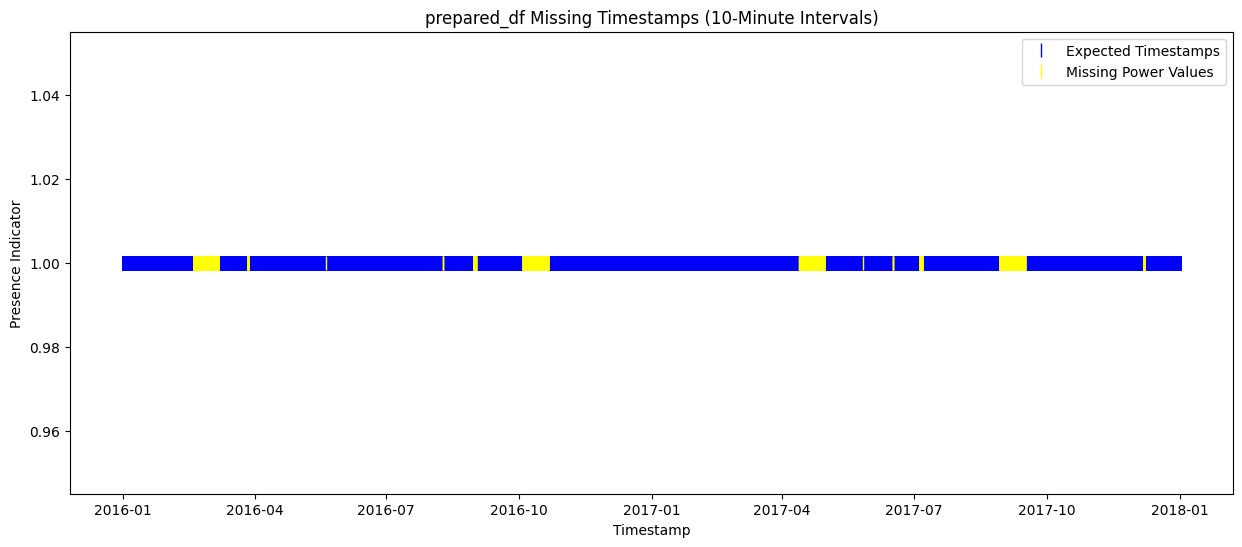

------------------------------------------------------------------------------------------------------------------------------------------------------
Wind Turbine aggregate
checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  355
Total nan data entries:  0


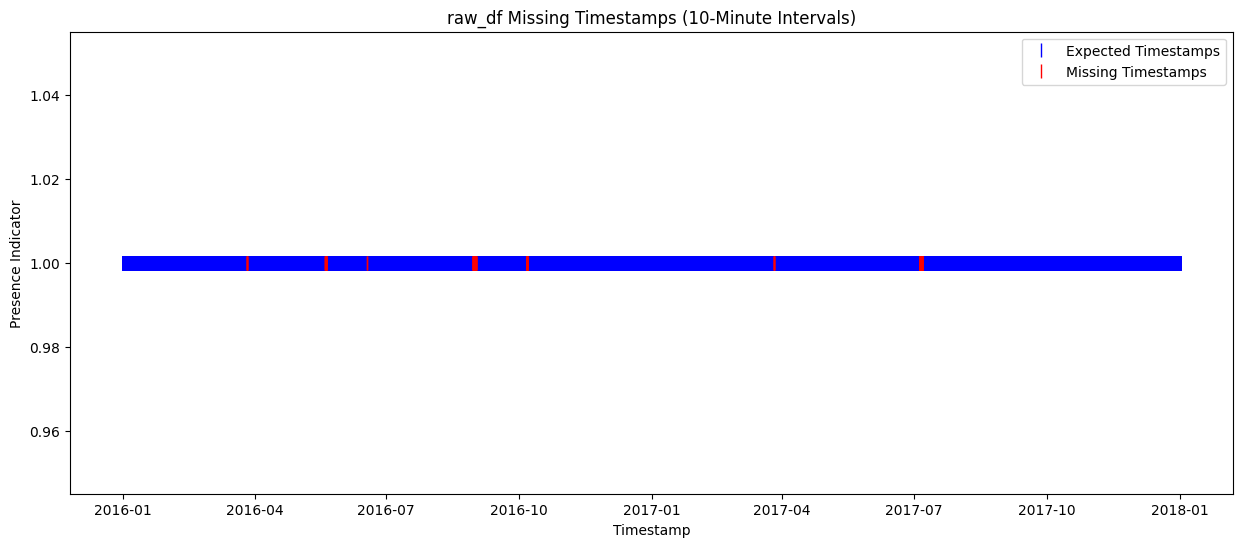

checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  57164


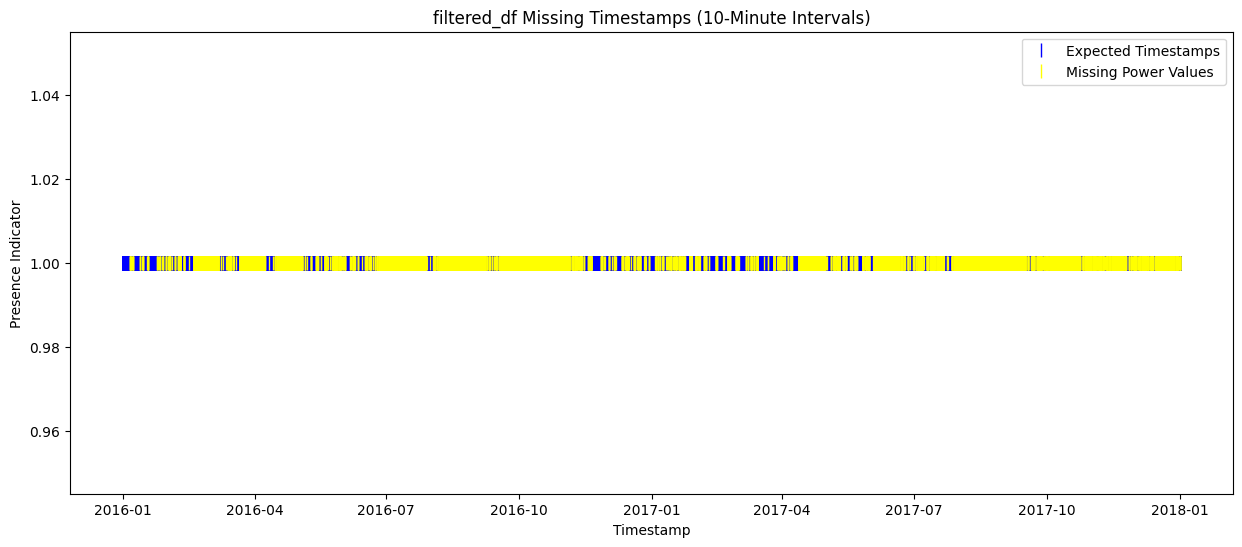

checking for prepared_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  470844


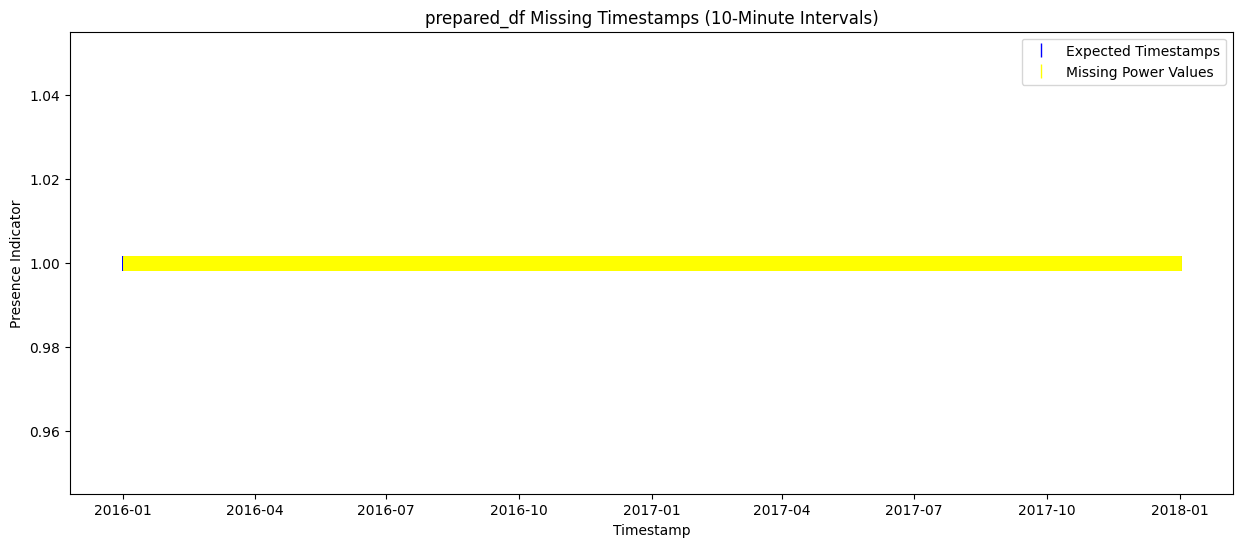

------------------------------------------------------------------------------------------------------------------------------------------------------


In [14]:
WTs = ["01", "06", "07", "11", "aggregate"]

for WT in WTs: 
    print(f"Wind Turbine {WT}")
    data_folder_path = "/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/"

    if WT == "aggregate": 
        filtered_df = get_aggregate_data("/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/EDP_filtered/")
        prepared_df = get_aggregate_data("/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/data_prep/")
        raw_df = get_aggregate_data("/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/EDP/")
    else: 
        filtered_df = pd.read_csv(f"/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/EDP_filtered/WT_{WT}.csv")
        prepared_df = pd.read_csv(f"/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/data_prep/EDP_WT_{WT}.csv")
        raw_df = pd.read_csv(f"/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/EDP/WT_{WT}.csv")

    df_names = ["raw_df", "filtered_df", "prepared_df"]
    dfs = [raw_df, filtered_df, prepared_df]
    cols_of_interest = (['Gen_speed', 'Gen_speed_std', 'Rotor_speed', 'Rotor_speed_std', 'Power'])

    for df, df_name in zip(dfs, df_names): 
        check_zero_features_zero_wind(df, df_name, cols_of_interest)
        visualize_missing_data(df, df_name)
    print ("-" * 150)

Wind Turbine 01
checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  593
Total nan data entries:  0


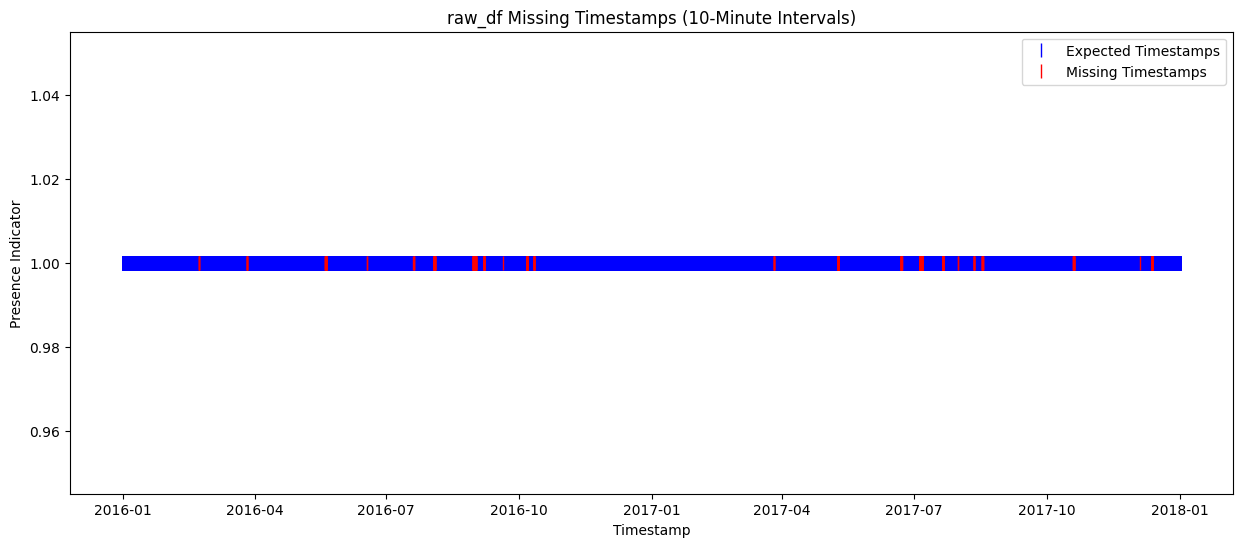

checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  2651


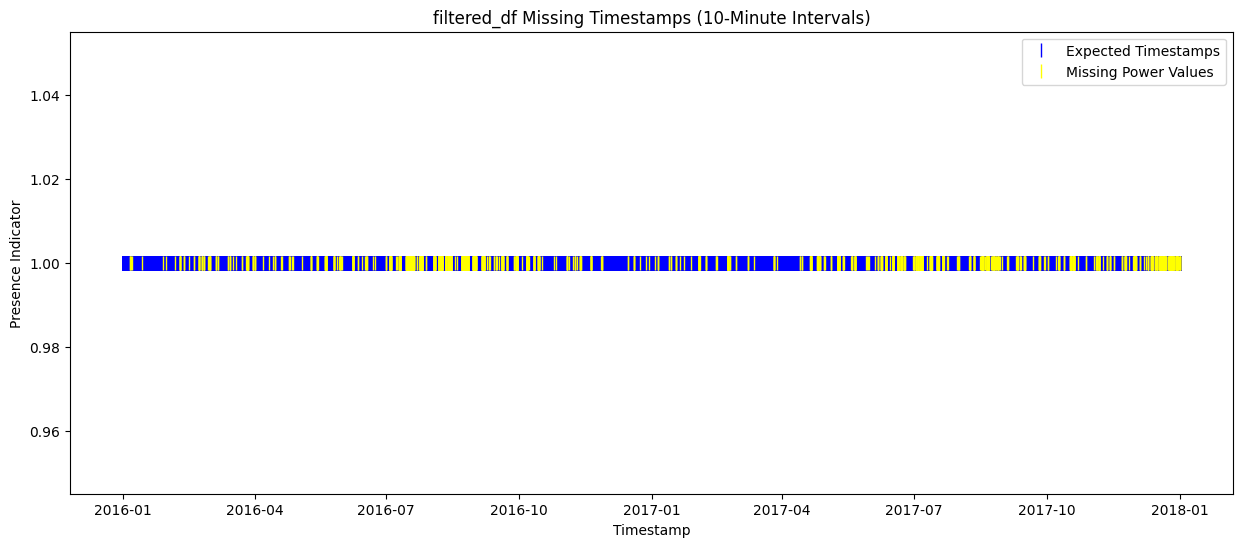

checking for prepared_df missing data ...
Total expected timestamps:  105261
Total missing timestamps:  0
Total nan data entries:  680


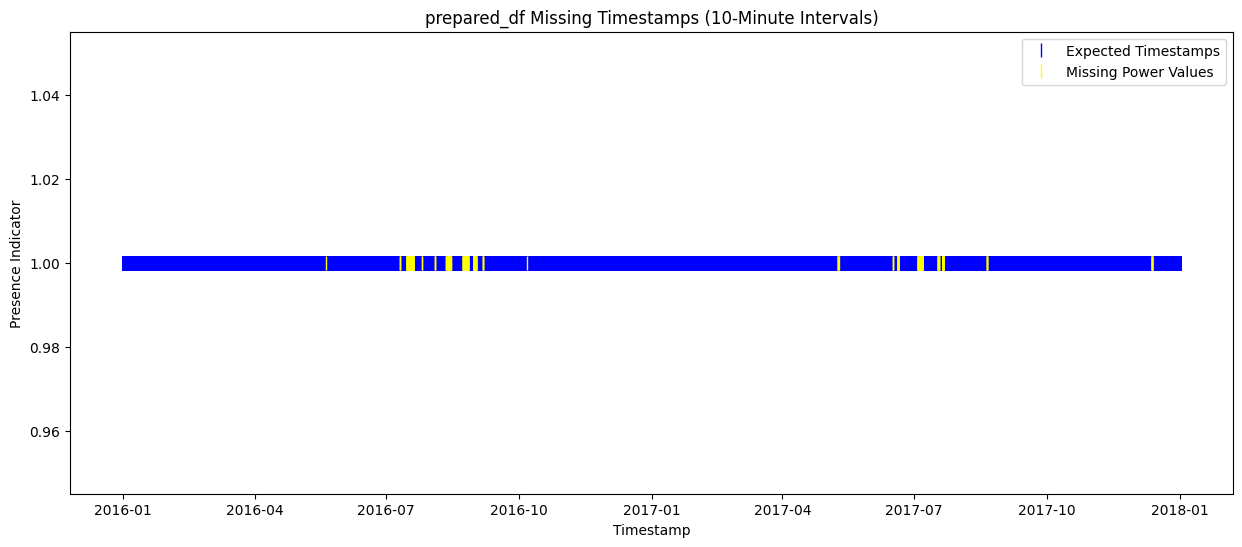

------------------------------------------------------------------------------------------------------------------------------------------------------
Wind Turbine 06
checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  2355
Total nan data entries:  0


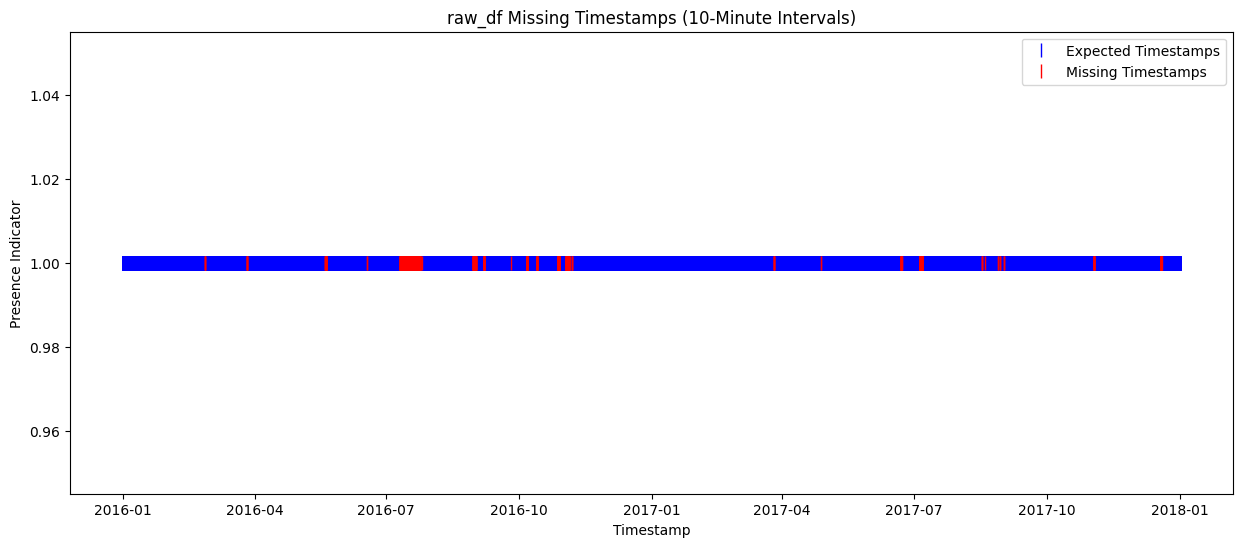

checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  4927


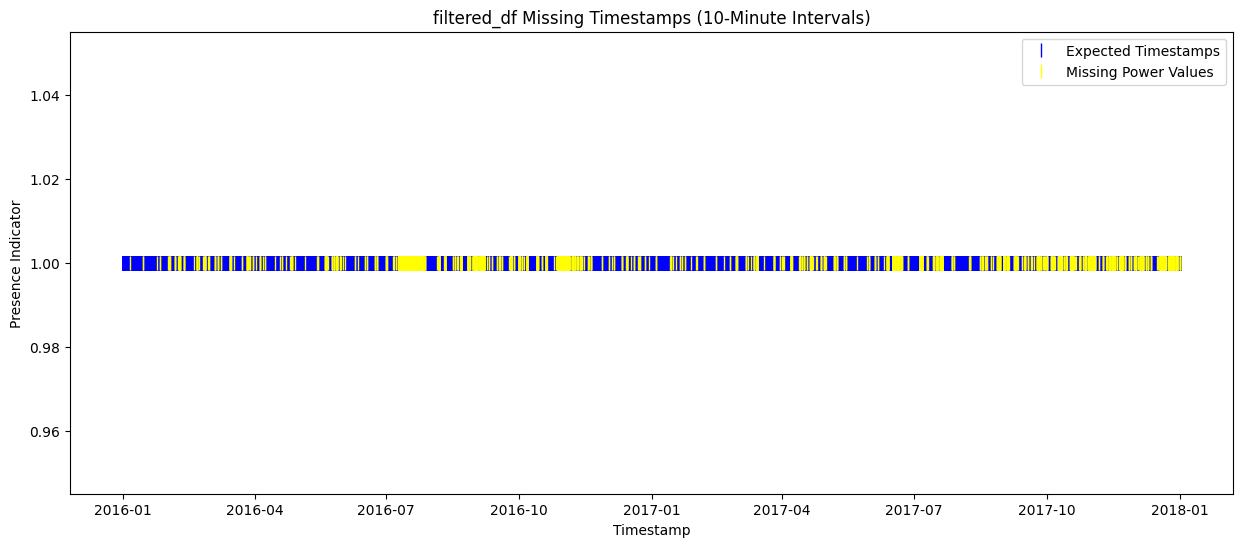

checking for prepared_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  2711


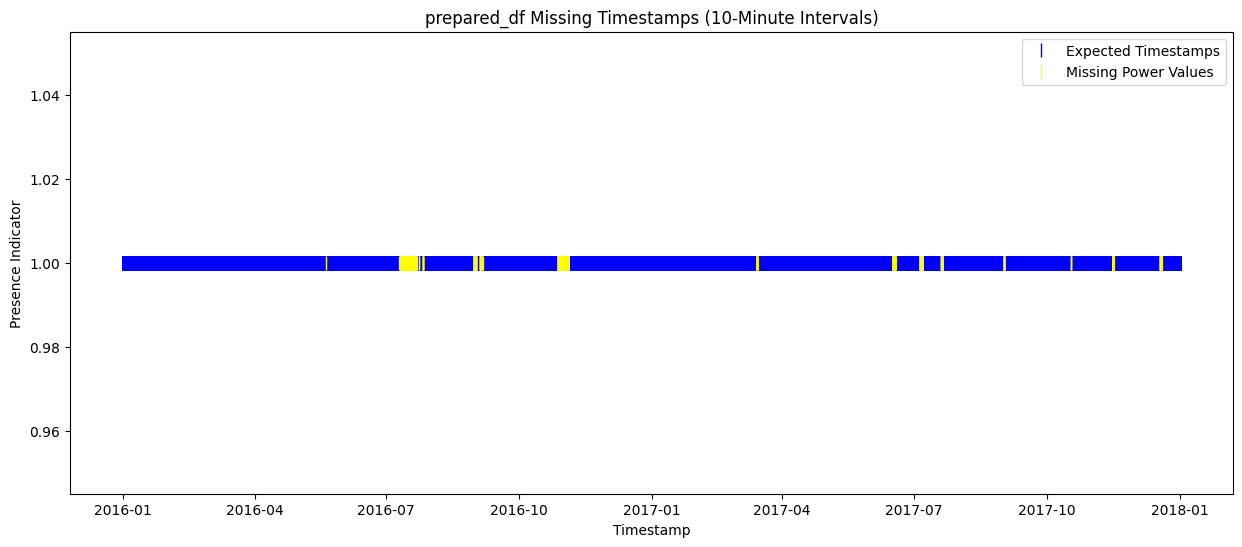

------------------------------------------------------------------------------------------------------------------------------------------------------
Wind Turbine 07
checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  537
Total nan data entries:  0


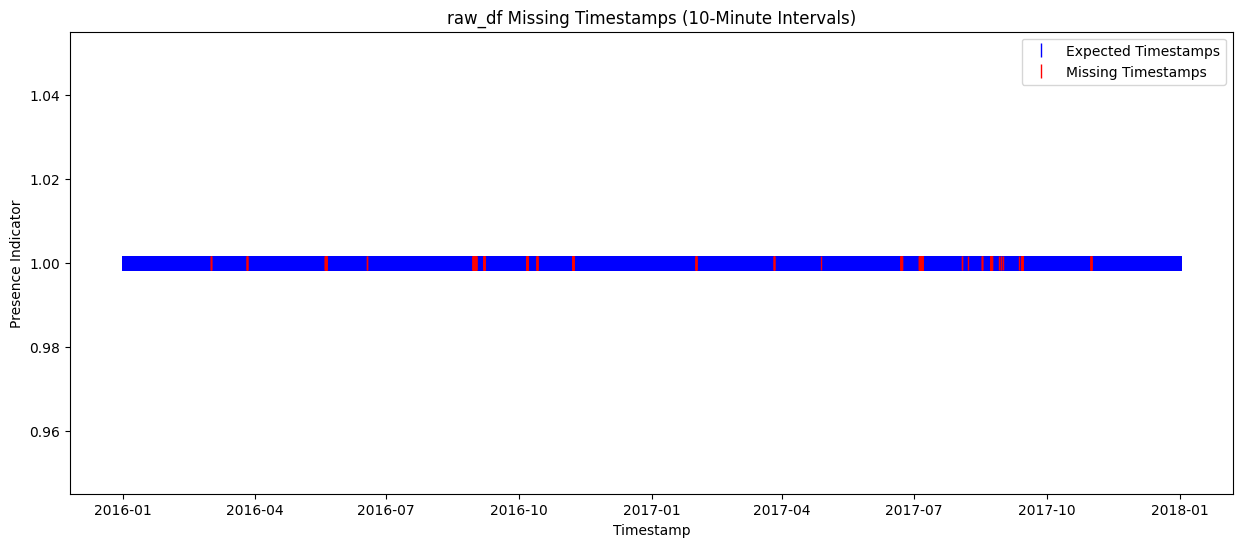

checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  4025


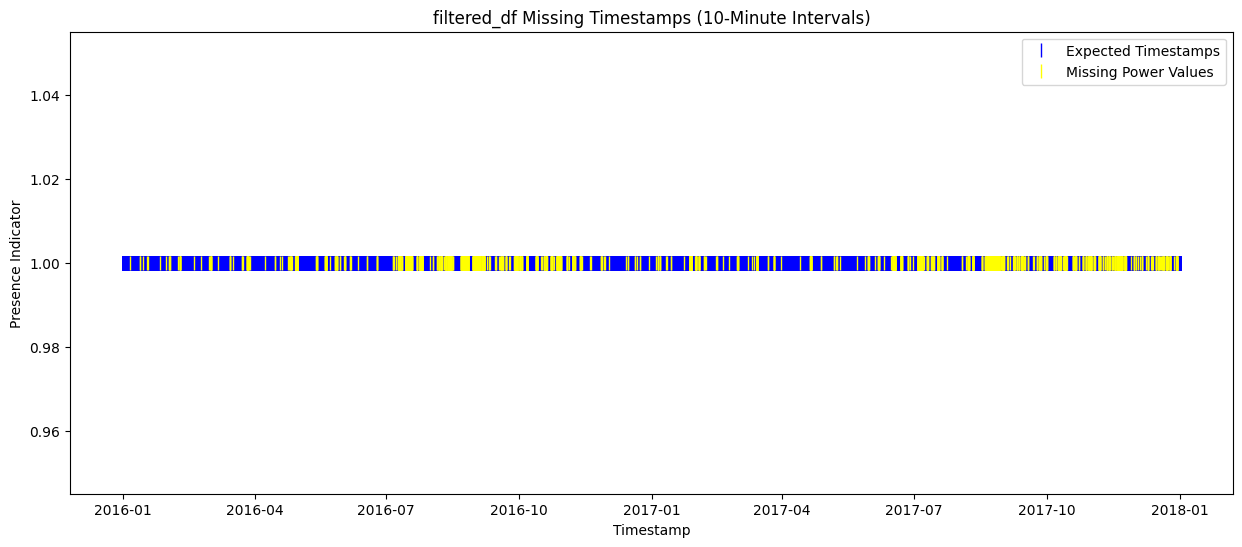

checking for prepared_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  1615


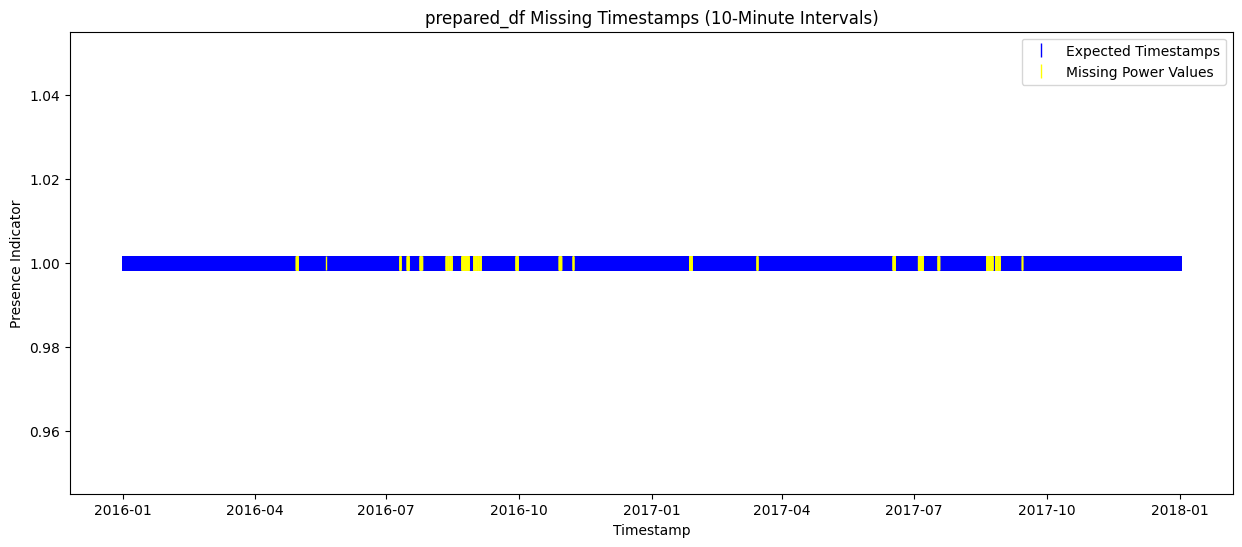

------------------------------------------------------------------------------------------------------------------------------------------------------
Wind Turbine 11
checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  478
Total nan data entries:  0


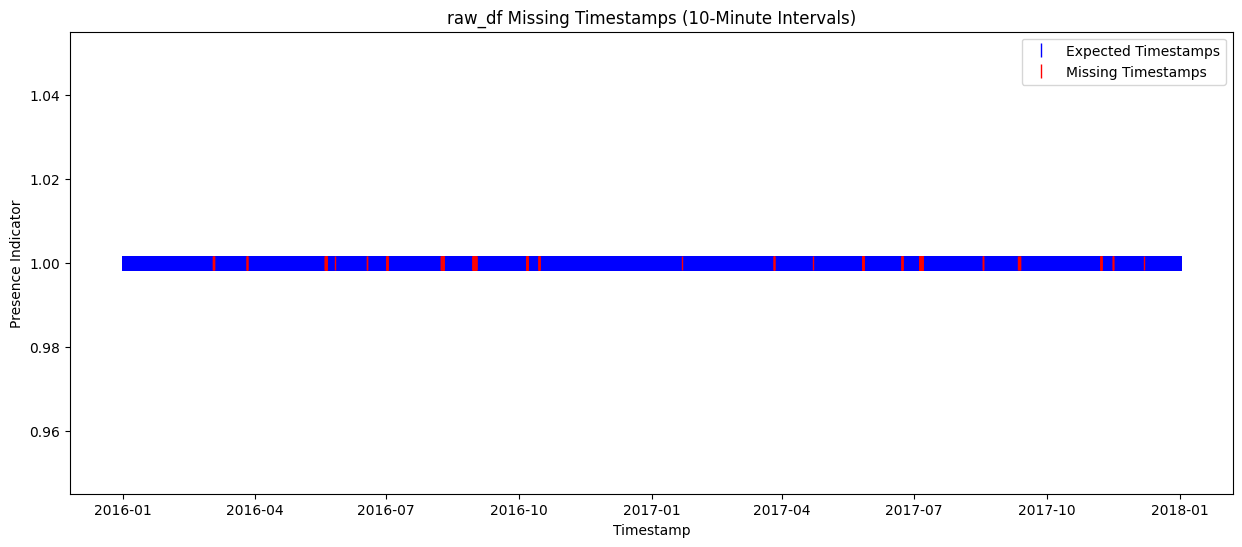

checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  1815


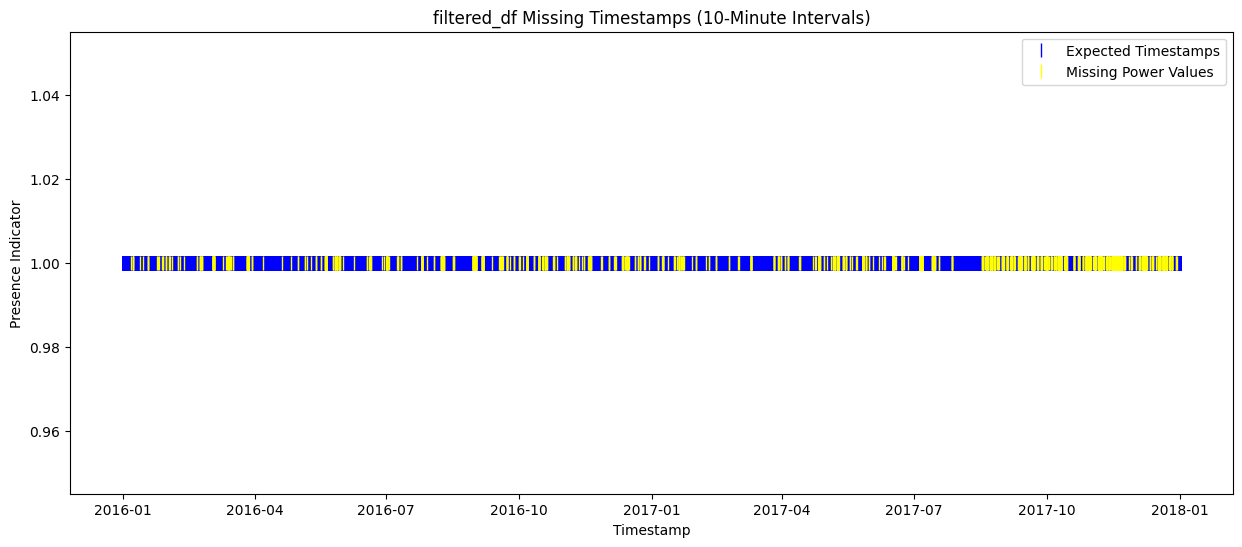

checking for prepared_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  296


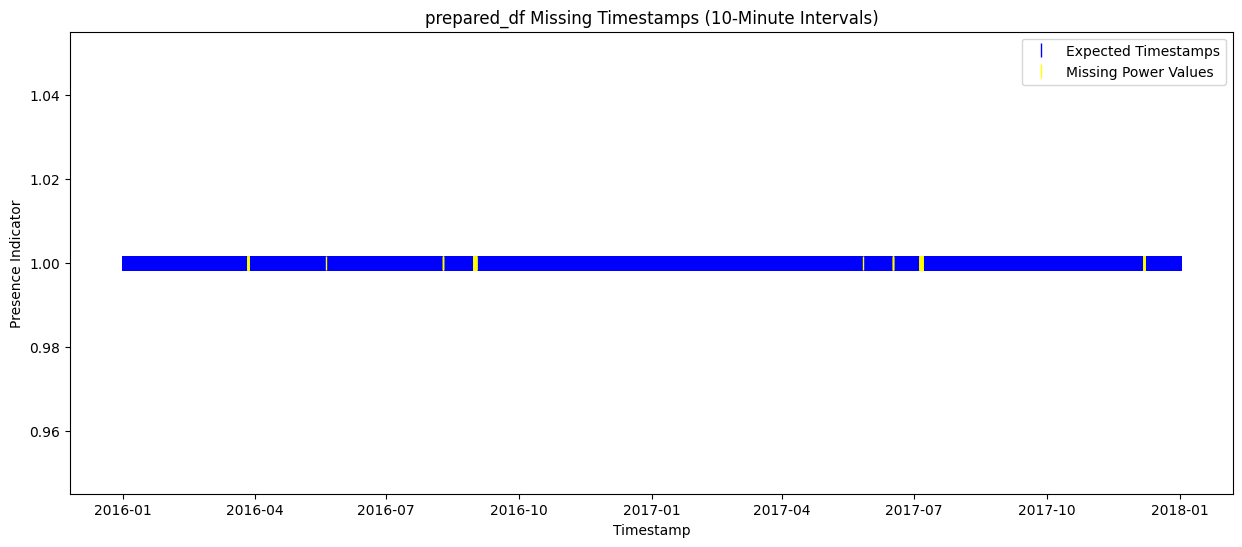

------------------------------------------------------------------------------------------------------------------------------------------------------
Wind Turbine aggregate
checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  355
Total nan data entries:  0


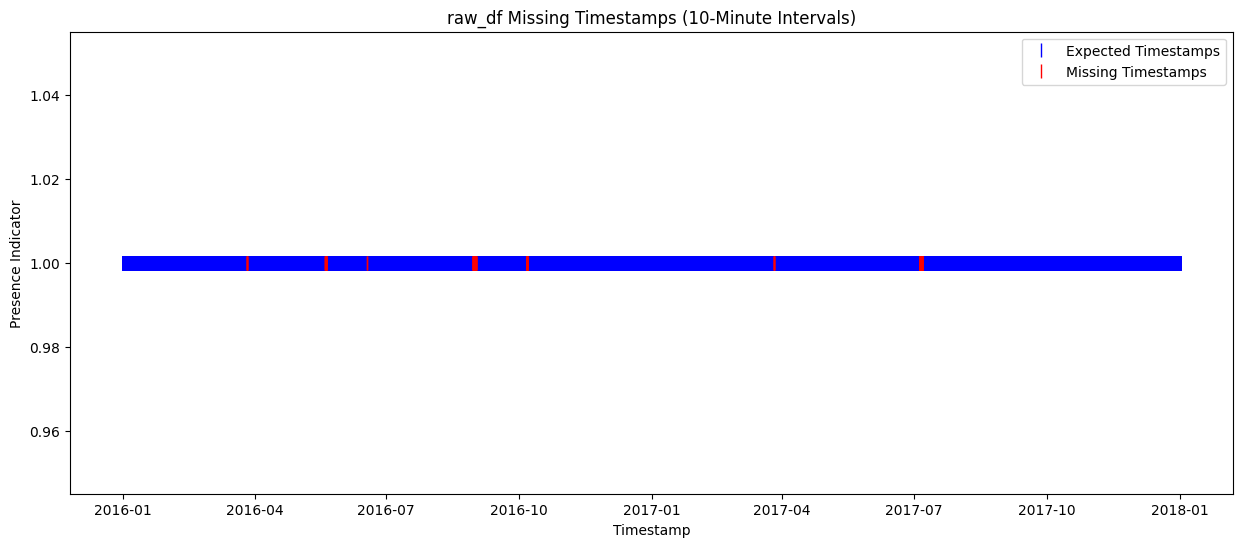

checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  13418


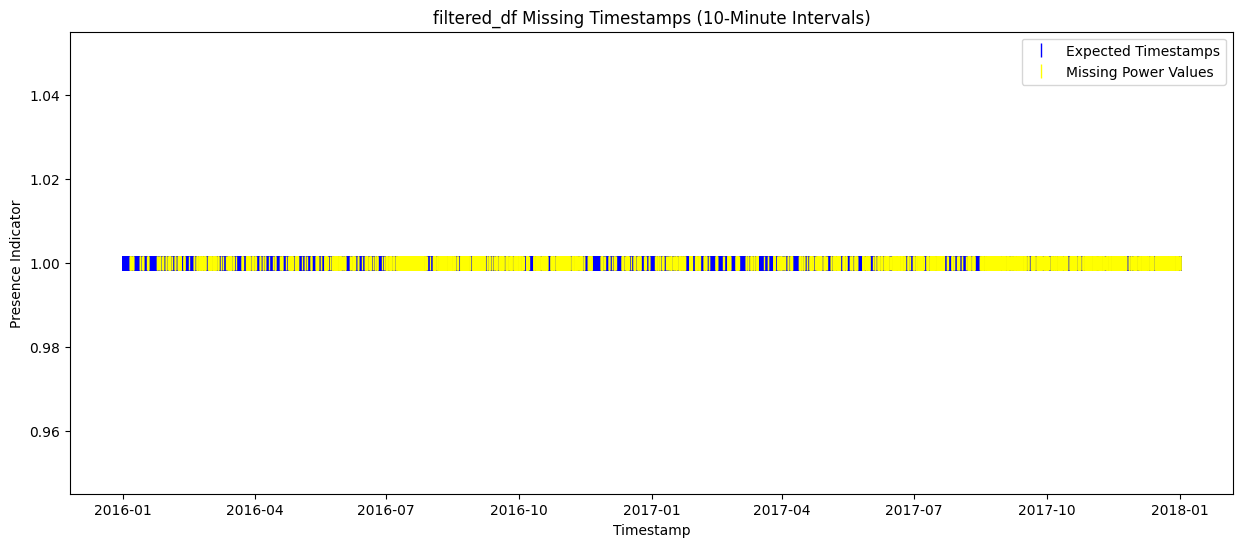

checking for prepared_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  5302


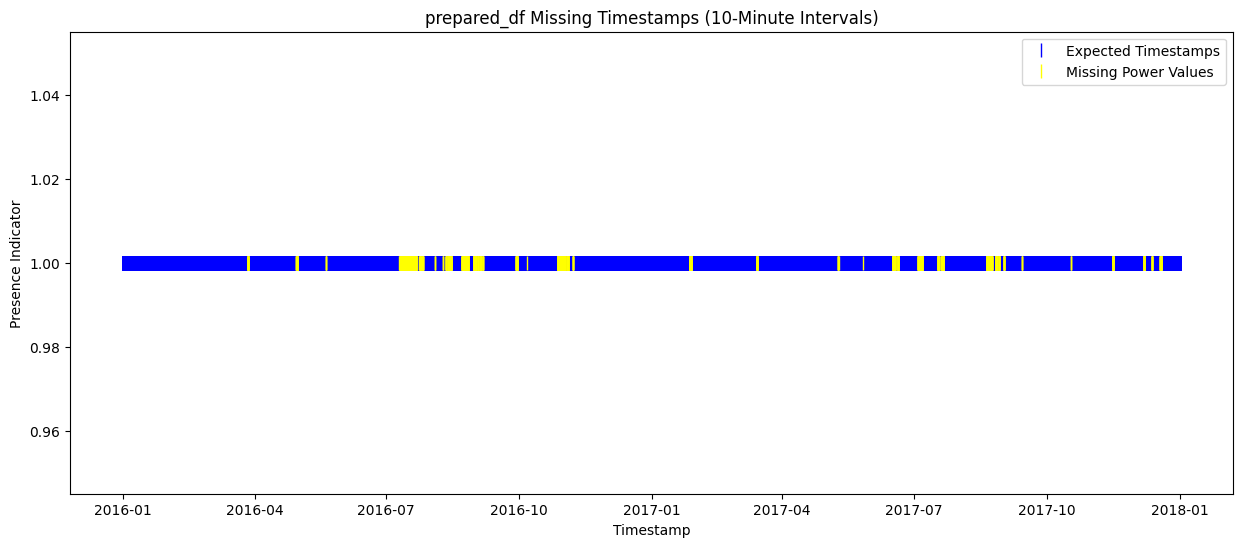

------------------------------------------------------------------------------------------------------------------------------------------------------


In [16]:
WTs = ["01", "06", "07", "11", "aggregate"]

for WT in WTs: 
    print(f"Wind Turbine {WT}")
    data_folder_path = "/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/"

    if WT == "aggregate": 
        filtered_df = get_aggregate_data("/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/EDP_filtered_faults_included/")
        prepared_df = get_aggregate_data("/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/data_prep_faults_included/")
        raw_df = get_aggregate_data("/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/EDP/")
    else: 
        filtered_df = pd.read_csv(f"/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/EDP_filtered_faults_included/WT_{WT}.csv")
        prepared_df = pd.read_csv(f"/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/data_prep_faults_included/EDP_WT_{WT}.csv")
        raw_df = pd.read_csv(f"/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/EDP/WT_{WT}.csv")

    df_names = ["raw_df", "filtered_df", "prepared_df"]
    dfs = [raw_df, filtered_df, prepared_df]
    cols_of_interest = (['Gen_speed', 'Gen_speed_std', 'Rotor_speed', 'Rotor_speed_std', 'Power'])

    for df, df_name in zip(dfs, df_names): 
        check_zero_features_zero_wind(df, df_name, cols_of_interest)
        visualize_missing_data(df, df_name)
    print ("-" * 150)